In [8]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


# Import Dependecies and API Key

In [66]:
# Import Dependencies 
import json 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from config import api_key
from citipy import citipy




# Get the cities we will use for the API request

In [10]:
# Create list to store latitude and longitude as well as the citites. Thank you to Dylan for helping.
lat_long = []
cities = []

# Randomly generate latitude and longitude to be used. The numbers are specifically for europe 
lats = np.random.uniform(low= -20, high=60.000, size=1000)
long = np.random.uniform(low=-10, high=25, size=1000)

# Create pairings for latitude and longitude 
lat_long = zip(lats,long)

# Check for the cities near the coordinates given and get rid of any possible duplicates.
for coor in lat_long:
    city = citipy.nearest_city(coor[0], coor[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

533

# API Request 

### Create the API URL and do a practice request to find the structure. 

In [11]:
# API URL given in the email 
url = 'http://api.openweathermap.org'
# Query URL we will use 
query_url = f"{url}/data/2.5/weather?appid={api_key}&units=imperial&q="
# Practice response to see formating 
response = requests.get(query_url + cities[1]).json()
# Print the response 
response

{'coord': {'lon': 22.4, 'lat': 8.08},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 70.2,
  'feels_like': 70.12,
  'temp_min': 70.2,
  'temp_max': 70.2,
  'pressure': 1007,
  'humidity': 61,
  'sea_level': 1007,
  'grnd_level': 928},
 'wind': {'speed': 3.51, 'deg': 200},
 'clouds': {'all': 68},
 'dt': 1585950532,
 'sys': {'country': 'CF', 'sunrise': 1585888015, 'sunset': 1585931993},
 'timezone': 3600,
 'id': 236901,
 'name': 'Ouadda',
 'cod': 200}

# Run API request for all cities 

#### Run API request and store information in the empty list and print them as they go 

In [12]:
# Create empty list for storing all the data we will get from the request 
tempeture = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
name = []
country = []
count = 0 

# iterate through all the cities we gathered and print the count and which city and gather all information 
for weather in cities:
    try:
        response = requests.get(query_url + weather).json()
        longitude.append(response['coord']['lon'])
        latitude.append(response['coord']['lat'])
        tempeture.append(response['main']['feels_like'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        name.append(response['name'])
        wind_speed.append(response['wind']['speed'])
        print(f"Checking City number {count} which is {weather}")
        count = count + 1 
    except:
        print('Exception has occured...')
              

              

Checking City number 0 which is jamestown
Checking City number 1 which is ouadda
Checking City number 2 which is methoni
Checking City number 3 which is marsala
Checking City number 4 which is revnice
Checking City number 5 which is plouzane
Checking City number 6 which is skegness
Checking City number 7 which is georgetown
Checking City number 8 which is bouar
Checking City number 9 which is constantine
Checking City number 10 which is faya
Checking City number 11 which is nalut
Checking City number 12 which is banloc
Checking City number 13 which is zaria
Checking City number 14 which is faro
Checking City number 15 which is liepaja
Checking City number 16 which is ongandjera
Checking City number 17 which is awbari
Checking City number 18 which is marzuq
Checking City number 19 which is yenagoa
Checking City number 20 which is lixourion
Checking City number 21 which is kallithiron
Checking City number 22 which is tiznit
Checking City number 23 which is opuwo
Checking City number 24 w

Checking City number 190 which is ouahigouya
Checking City number 191 which is voiron
Exception has occured...
Checking City number 192 which is surt
Checking City number 193 which is moanda
Checking City number 194 which is feltre
Checking City number 195 which is palma
Checking City number 196 which is biltine
Checking City number 197 which is toumodi
Checking City number 198 which is kidal
Checking City number 199 which is grasse
Checking City number 200 which is gao
Exception has occured...
Checking City number 201 which is buncrana
Checking City number 202 which is grand-lahou
Checking City number 203 which is miastko
Checking City number 204 which is lugo
Checking City number 205 which is ripoll
Checking City number 206 which is nojorid
Checking City number 207 which is ninove
Checking City number 208 which is bondoukou
Checking City number 209 which is moussoro
Checking City number 210 which is sandwick
Checking City number 211 which is matadi
Checking City number 212 which is l

Checking City number 377 which is rafai
Checking City number 378 which is tsumeb
Checking City number 379 which is heiligenhafen
Checking City number 380 which is sinnai
Checking City number 381 which is kasongo-lunda
Checking City number 382 which is timizart
Checking City number 383 which is hun
Checking City number 384 which is concarneau
Checking City number 385 which is niono
Checking City number 386 which is owerri
Checking City number 387 which is leo
Exception has occured...
Checking City number 388 which is waddan
Checking City number 389 which is tema
Checking City number 390 which is vagur
Exception has occured...
Checking City number 391 which is loubomo
Checking City number 392 which is oberursel
Checking City number 393 which is sembe
Exception has occured...
Checking City number 394 which is lodja
Checking City number 395 which is nerja
Checking City number 396 which is winsum
Checking City number 397 which is kibala
Checking City number 398 which is benavente
Checking C

# Create Table with Information

In [22]:
# Create dictionary to store all list so we can make dataframe 

weather_dictionary = {
    'Country': country, 'City': name, 'Latitude': latitude, 'Longitude': longitude,
    'Tempeture': tempeture, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed
}

# Create the data frame
weather_df = pd.DataFrame(data = weather_dictionary)
weather_df

# export to csv 
output_data = 'weather.csv'

weather_df.to_csv(output_data)

weather_df

,Country,City,Latitude,Longitude,Tempeture,Humidity,Cloudiness,Wind Speed
0,US,Jamestown,42.10,-79.24,36.12,65,90,11.41
1,CF,Ouadda,8.08,22.40,70.12,61,68,3.51
2,GR,Methóni,36.82,21.70,55.51,67,100,4.70
3,IT,Marsala,37.80,12.44,44.62,87,20,8.05
4,CZ,Řevnice,49.91,14.24,35.80,70,51,5.82
...,...,...,...,...,...,...,...,...
496,IT,Ariccia,41.72,12.68,42.44,81,21,4.70
497,BG,Laki,41.85,24.82,40.69,87,100,3.36
498,CG,Loandjili,-4.76,11.86,93.85,79,20,3.36
499,ES,Salou,41.08,1.14,46.56,81,0,4.70


# Graph Temperature vs Latitude 

#### We can see that as the latitude goes up the temperature goes down 

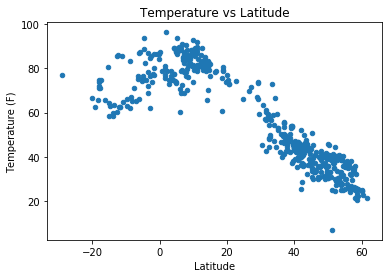

In [118]:
graph1 = weather_df.plot.scatter(x='Latitude', y='Tempeture', title='Temperature vs Latitude')
graph1.set_ylabel('Temperature (F)')
plt.savefig('TempvsLat')


# Graph Humidity vs Latitude 

#### We can see that the graph resembles that of when you plot cos. This seems to happen every 20 degrees in the Latitude.

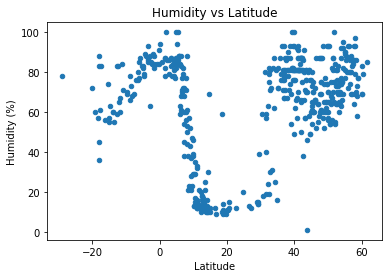

In [119]:
graph2 = weather_df.plot.scatter(x='Latitude', y='Humidity', title='Humidity vs Latitude')
graph2.set_ylabel('Humidity (%)')
plt.savefig('HumvsLat')

# Graph Cloudiness vs Latitude 

#### There does not seem to be any trend when it comes to Cloudiness. 

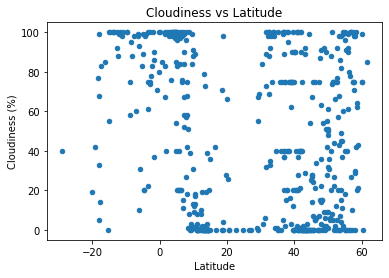

In [120]:
graph3 = weather_df.plot.scatter(x='Latitude', y='Cloudiness', title='Cloudiness vs Latitude')
graph3.set_ylabel('Cloudiness (%)')
plt.savefig('CloudinessVsLat')

# Graph Wind Speeds vs Latitude 

#### The wind speed looks like it is rising and hits the max windspeed at 30 then goes down and it seems to be consistently between 15 to 0 for the latitude range we have. 

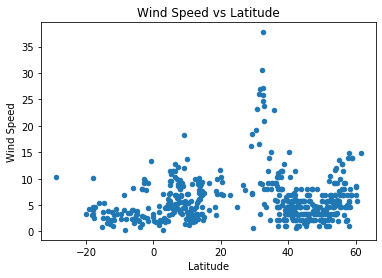

In [121]:
graph4 = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Wind Speed vs Latitude')
plt.savefig('WindSpeedVsLat')

# Seperate orginal Table into North and South Hemispheres

In [37]:
# Create favored team table
north_hemi = []
south_hemi = []

# Iterate through the table and make two seperate list to be made into tables for ease of access 
for i in range(1,weather_df.shape[0], 1):
    if (weather_df['Latitude'].iloc[i] >= 0):
        north_hemi.append(weather_df.iloc[i])
    else:
        south_hemi.append(weather_df.iloc[i])
        
# len(north_hemi)
# len(south_hemi)

# Create data frames for each hemi. 
north_hemi_df = pd.DataFrame(data = north_hemi)
south_hemi_df = pd.DataFrame(data = south_hemi)


# Graph Temperature vs Latitude for Northern Hemisphere

#### It is clear to see there is a downward trend for the temperature in the northern hemisphere. Meaning that as the Latitude goes up the temperature goes down. 

rvalue = -0.955
r-squared = 0.912


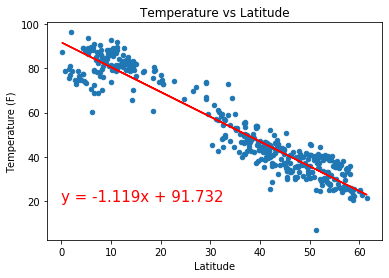

<Figure size 432x288 with 0 Axes>

In [123]:
# X and Y axis
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Tempeture']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph5 = north_hemi_df.plot.scatter(x='Latitude', y='Tempeture', title='Temperature vs Latitude')
graph5.set_ylabel('Temperature (F)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 20),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.show()
plt.savefig('NHTempVsLat')


# Graph Temperature vs Latitude for Southern Hemisphere

#### We do not have much data for our southern Hemisphere graph but we can see that as we go up in latitude our temperature rises. 

rvalue = 0.448
r-squared = 0.201


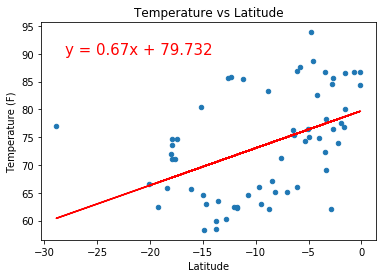

In [124]:
# X and Y axis
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Tempeture']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph6 = south_hemi_df.plot.scatter(x='Latitude', y='Tempeture', title='Temperature vs Latitude')
graph6.set_ylabel('Temperature (F)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-28, 90),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('STempVsLat')


# Graph Humidity vs Latitude for Northern Hemisphere

#### We can see a flucuation again close to that of a cos graph where it hits its peak minimum  then continually rises. 

rvalue = 0.42
r-squared = 0.176


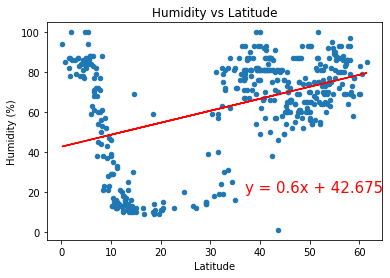

In [125]:
# X and Y axis
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Humidity']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph7 = north_hemi_df.plot.scatter(x='Latitude', y='Humidity', title='Humidity vs Latitude')
graph7.set_ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(37, 20),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('NHumidityVsLat')



# Graph Humidity vs Latitude for Southern Hemisphere

#### Pretty clear positive trend for as humidity goes up so does latitude

rvalue = 0.606
r-squared = 0.367


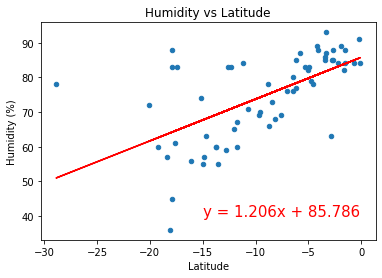

In [126]:
# X and Y axis
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Humidity']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph8 = south_hemi_df.plot.scatter(x='Latitude', y='Humidity', title='Humidity vs Latitude')
graph8.set_ylabel('Humidity (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15, 40),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('SHumidityVsLat')



# Graph Cloudiness vs Latitude for Northern Hemisphere

#### There seems to be no trend for the cloudiness 

rvalue = -0.068
r-squared = 0.005


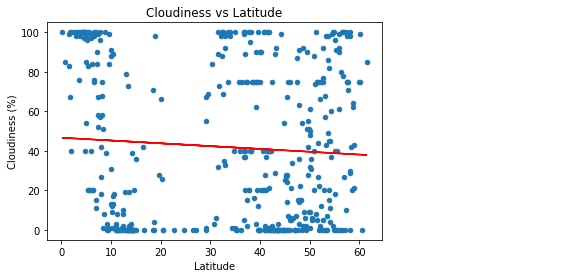

In [127]:
# X and Y axis
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Cloudiness']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph9 = north_hemi_df.plot.scatter(x='Latitude', y='Cloudiness', title='Cloudiness vs Latitude')
graph9.set_ylabel('Cloudiness (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,20),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('NCloudsVsLat')



# Graph Cloudiness vs Latitude for Southern Hemisphere

#### We can see a upward trend but if we had more data for our southern hemisphere places we could get a definitive answer. 

rvalue = 0.205
r-squared = 0.042


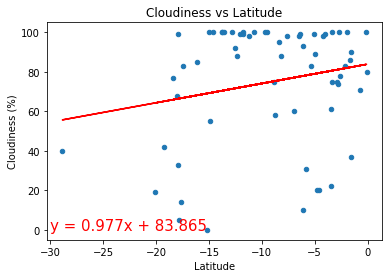

In [128]:
# X and Y axis
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Cloudiness']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph10 = south_hemi_df.plot.scatter(x='Latitude', y='Cloudiness', title='Cloudiness vs Latitude')
graph10.set_ylabel('Cloudiness (%)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 0),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('SCloudsVsLat')


# Graph Windspeed vs Latitude for Northern Hemisphere

#### There seems to be a consistent grouping of windspeed for all the places in latitudes we are given. 

rvalue = -0.039
r-squared = 0.002


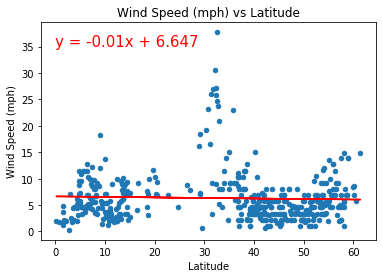

In [129]:
# X and Y axis
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Wind Speed']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph11 = north_hemi_df.plot.scatter(x='Latitude', y='Wind Speed', title='Wind Speed (mph) vs Latitude')
graph11.set_ylabel('Wind Speed (mph)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 35),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('NWindsVsLat')



# Graph Windspeed vs Latitude for Southern Hemisphere

#### There seems to be a grouping once again for the windspeeds. 

rvalue = 0.076
r-squared = 0.006


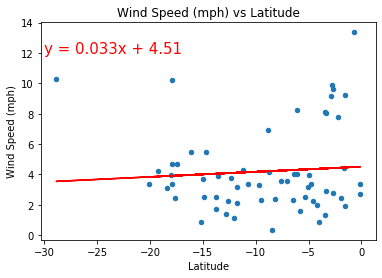

In [130]:
# X and Y axis
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Wind Speed']

# Linear regression 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

# Created scatter plot 
graph12 = south_hemi_df.plot.scatter(x='Latitude', y='Wind Speed', title='Wind Speed (mph) vs Latitude')
graph12.set_ylabel('Wind Speed (mph)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 12),fontsize=15,color="red")
print(f"rvalue = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")
plt.savefig('SWindsVsLat')